In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("spaceship-titanic/train.csv")
test = pd.read_csv("spaceship-titanic/test.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
print(train.HomePlanet.unique())

['Europa' 'Earth' 'Mars' nan]


In [6]:
train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [7]:
train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [8]:
train['PassengerGroup'] = train['PassengerId'].apply(lambda x:x.split('_')[0])

In [9]:
train['PassengerGroup'] = pd.to_numeric(train['PassengerGroup'])

<AxesSubplot:ylabel='Transported'>

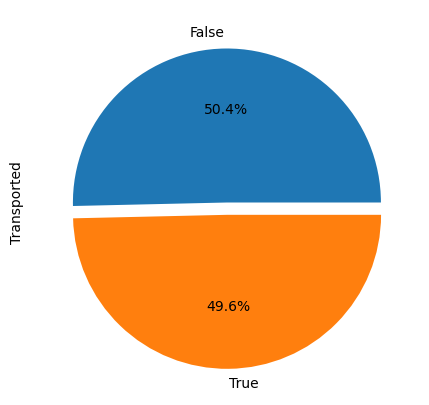

In [10]:
train['Transported'].value_counts()

plt.figure(figsize=(8, 5))
labels=train['Transported'].unique()
train['Transported'].value_counts().plot.pie(explode=[0, 0.08], autopct='%1.1f%%', labels=labels)


In [11]:
train['Cabin'] = train['Cabin'].fillna('N/-1/N') # Null값은 N/N/N으로 처리

train['CabinDeck'] = train['Cabin'].apply(lambda x:x.split('/')[0])
train['CabinNum'] = train['Cabin'].apply(lambda x:x.split('/')[1])
train['CabinSide'] = train['Cabin'].apply(lambda x:x.split('/')[2])

In [12]:
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='coerce')

In [13]:
train = train.drop(columns=['Cabin'], axis=1)

In [14]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,CabinNum
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,586.601173
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,513.906241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,152.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,407.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,983.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,1894.000000


In [15]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Name,CabinDeck,CabinSide
count,8693,8492,8476,8511,8490,8493,8693,8693
unique,8693,3,2,3,2,8473,9,3
top,0001_01,Earth,False,TRAPPIST-1e,False,Gollux Reedall,F,S
freq,1,4602,5439,5915,8291,2,2794,4288


In [16]:
train[train['RoomService'] > 10000]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinNum,CabinSide
4416,4690_02,Europa,False,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False,4690,N,-1,N


In [17]:
train.isna().sum()

PassengerId         0
HomePlanet        201
CryoSleep         217
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
PassengerGroup      0
CabinDeck           0
CabinNum            0
CabinSide           0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>],
       [<AxesSubplot:title={'center':'PassengerGroup'}>,
        <AxesSubplot:title={'center':'CabinNum'}>, <AxesSubplot:>]],
      dtype=object)

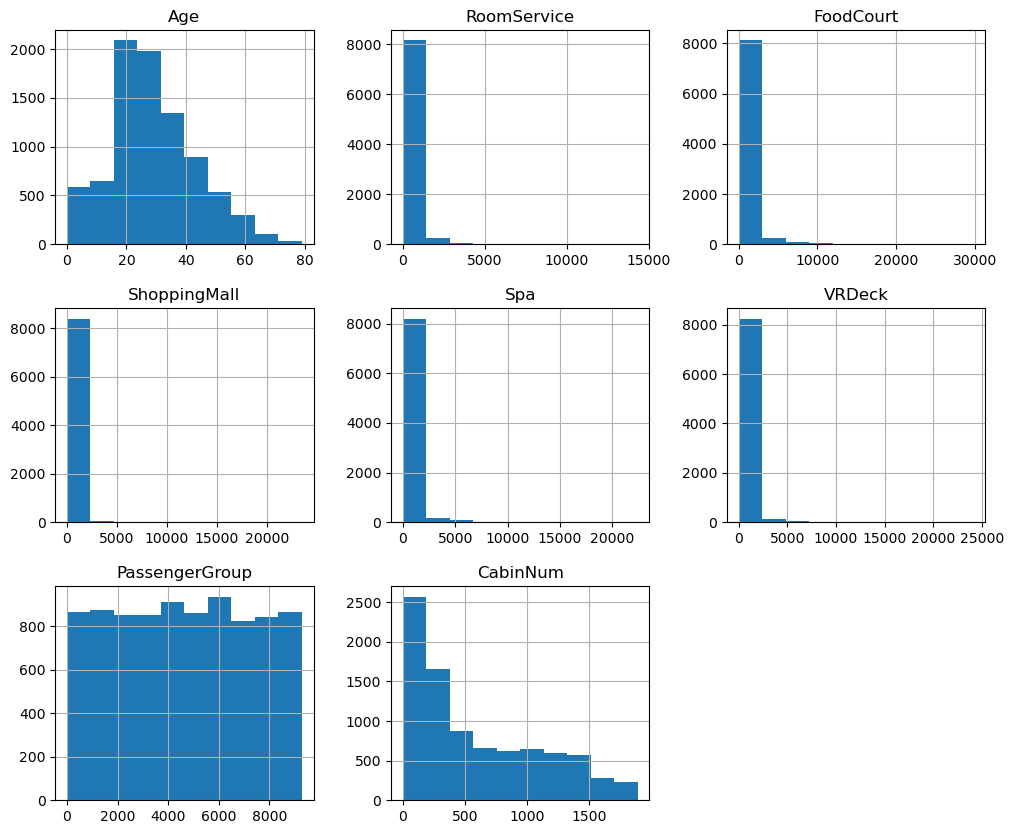

In [18]:
train.hist(figsize=(12, 10))

In [19]:
train[train['VIP'].isnull()].groupby('CabinDeck').count()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinNum,CabinSide
CabinDeck,,,,,,,,,,,,,,,,
A,6,6,6,6,6,0,6,5,5,6,6,6,6,6,6,6
B,12,12,12,12,12,0,12,12,12,12,12,12,12,12,12,12
C,19,19,19,19,19,0,19,17,19,19,19,19,19,19,19,19
D,9,9,9,9,8,0,9,9,9,8,9,9,9,9,9,9
E,15,15,15,15,15,0,15,15,15,15,15,15,15,15,15,15
F,70,68,67,68,67,0,69,69,68,70,70,70,70,70,70,70
G,66,65,62,64,65,0,63,66,65,65,65,65,66,66,66,66
N,6,6,6,6,5,0,6,6,6,6,6,6,6,6,6,6


In [20]:
train.loc[(train['VIP']==True) & (train['CabinDeck']=='N'), 'CabinDeck'] = 'B'
train.loc[(train['VIP']==False) & (train['CabinDeck']=='N'), 'CabinDeck'] = 'F'

In [21]:
train.loc[(train['VIP'].isna()) & (train['CabinDeck']=='N'), 'CabinDeck'] = 'F'
train.loc[(train['CabinDeck']=='B') & (train['CabinNum']==-1), 'CabinNum'] = 166
train.loc[(train['CabinDeck']=='F') & (train['CabinNum']==-1), 'CabinNum'] = 870

In [22]:
train.loc[(train['CabinDeck']=='B') & (train['CabinSide']=='N'), 'CabinSide'] = 'S'
train.loc[(train['CabinDeck']=='F') & (train['CabinSide']=='N'), 'CabinSide'] = 'P'

In [23]:
train.groupby('Destination').count()

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinNum,CabinSide
Destination,,,,,,,,,,,,,,,,
55 Cancri e,1800,1769,1756,1766,1757,1771,1763,1752,1761,1760,1757,1800,1800,1800,1800,1800
PSO J318.5-22,796,780,777,782,774,775,780,778,780,784,779,796,796,796,796,796
TRAPPIST-1e,5915,5765,5765,5787,5781,5787,5791,5778,5790,5781,5779,5915,5915,5915,5915,5915


In [24]:
train['CryoSleep'] = train['CryoSleep'].fillna(0)
train['VIP'] = train['VIP'].fillna(0)

train['RoomService'] = train['RoomService'].fillna(train['RoomService'].median())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].median())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].median())
train['Spa'] = train['Spa'].fillna(train['Spa'].median())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].median())
train['Age'] = train['Age'].fillna(train['Age'].median())

train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])

In [25]:
# 결측치 처리 후 처리 여부 확인
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
PassengerGroup      0
CabinDeck           0
CabinNum            0
CabinSide           0
dtype: int64

Text(0.5, 1.0, 'VIP')

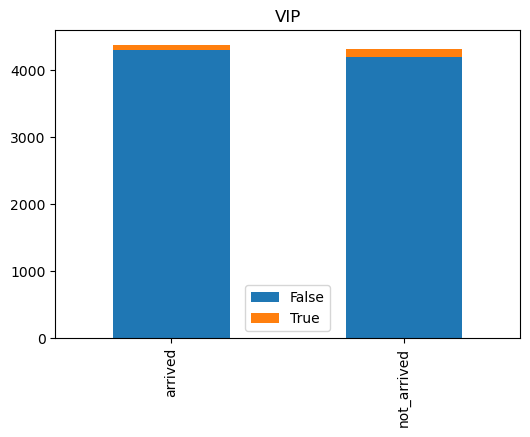

In [26]:
# VIP & Transported
train[['VIP', 'Transported']].groupby('VIP', as_index=False).mean().sort_values(by='Transported')

arrived = train[train['Transported']==True]['VIP'].value_counts()
not_arrived = train[train['Transported']==False]['VIP'].value_counts()

df = pd.DataFrame([arrived, not_arrived])
df.index = ['arrived', 'not_arrived']
df.plot(kind='bar', stacked=True, figsize=(6, 4))

plt.title("VIP")

<AxesSubplot:xlabel='Transported', ylabel='count'>

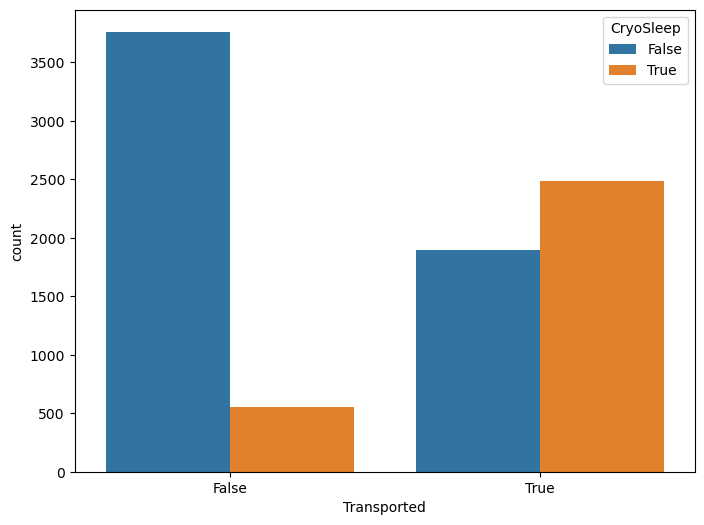

In [27]:
# CryoSleep & Transported
fig = plt.figure(figsize=(8, 6))

sns.countplot(x='Transported', hue='CryoSleep', data=train)

In [28]:
train[['Transported', 'CryoSleep']].groupby('CryoSleep').mean()

,Transported
CryoSleep,
False,0.335042
True,0.817583


In [29]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet').mean()

,Transported
HomePlanet,
Earth,0.427649
Europa,0.658846
Mars,0.523024


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

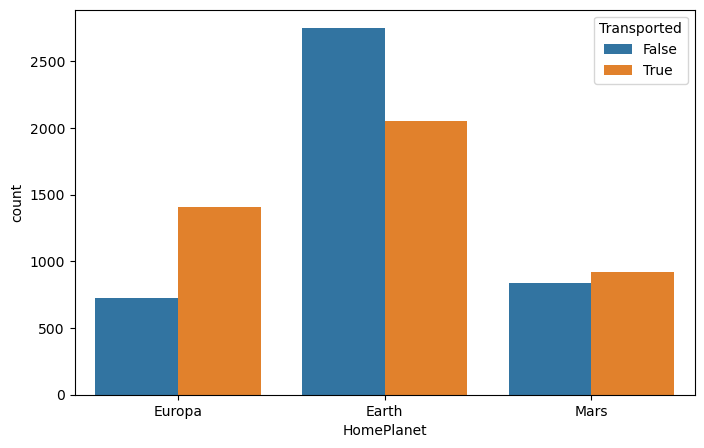

In [30]:
fig = plt.figure(figsize=(8, 5))

sns.countplot(x='HomePlanet', hue='Transported', data=train)

In [31]:
train[['Destination', 'Transported']].groupby('Destination').mean()

,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.472199


<AxesSubplot:xlabel='Destination', ylabel='count'>

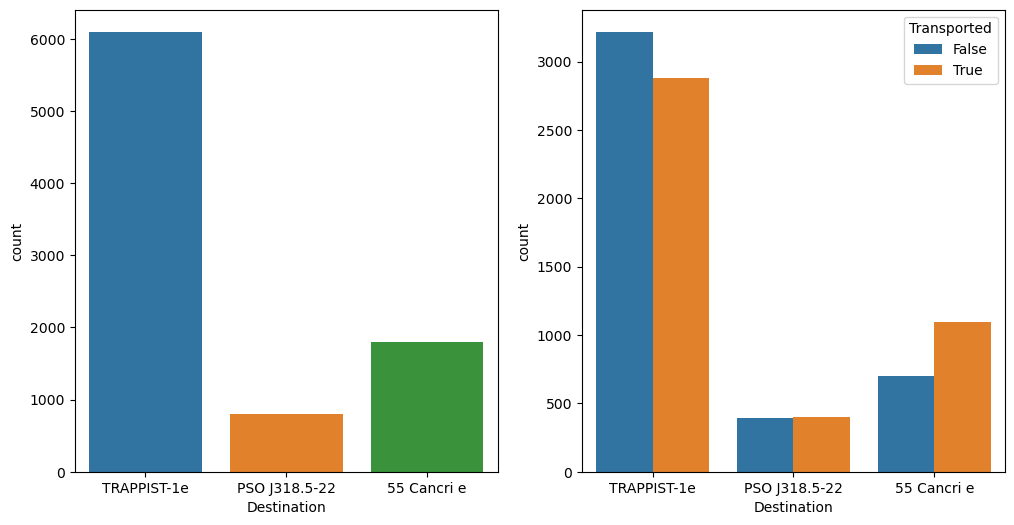

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='Destination', data=train, ax=axes[0])
sns.countplot(x='Destination', hue='Transported', data=train, ax=axes[1])

<Figure size 800x500 with 0 Axes>

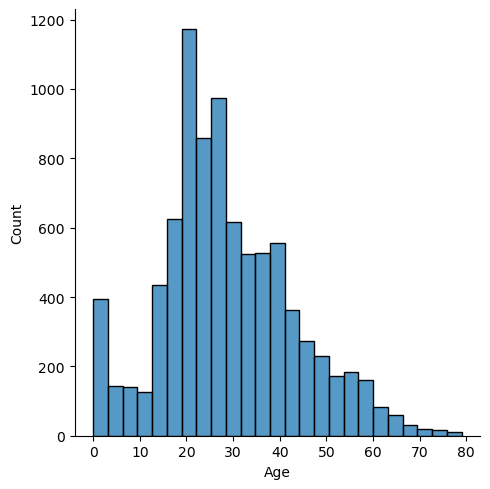

In [33]:
# 나이 분포 확인
fig = plt.figure(figsize=(8, 5))
sns.displot(train['Age'], bins=25)

<AxesSubplot:xlabel='Age', ylabel='Density'>

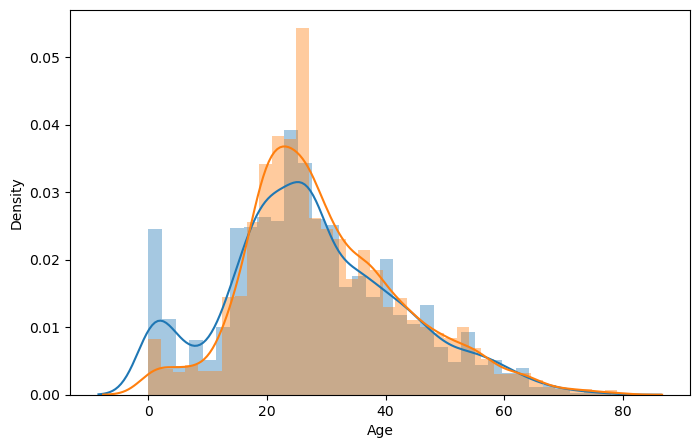

In [34]:
arrived = train[train['Transported']==True]
not_arrived = train[train['Transported']==False]

plt.figure(figsize=(8, 5))
sns.distplot(arrived['Age'])
sns.distplot(not_arrived['Age'])

In [35]:
train[['CabinDeck', 'Transported']].groupby('CabinDeck').mean()

,Transported
CabinDeck,
A,0.496094
B,0.729936
C,0.680054
D,0.433054
E,0.357306
F,0.444593
G,0.516217
T,0.200000


<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

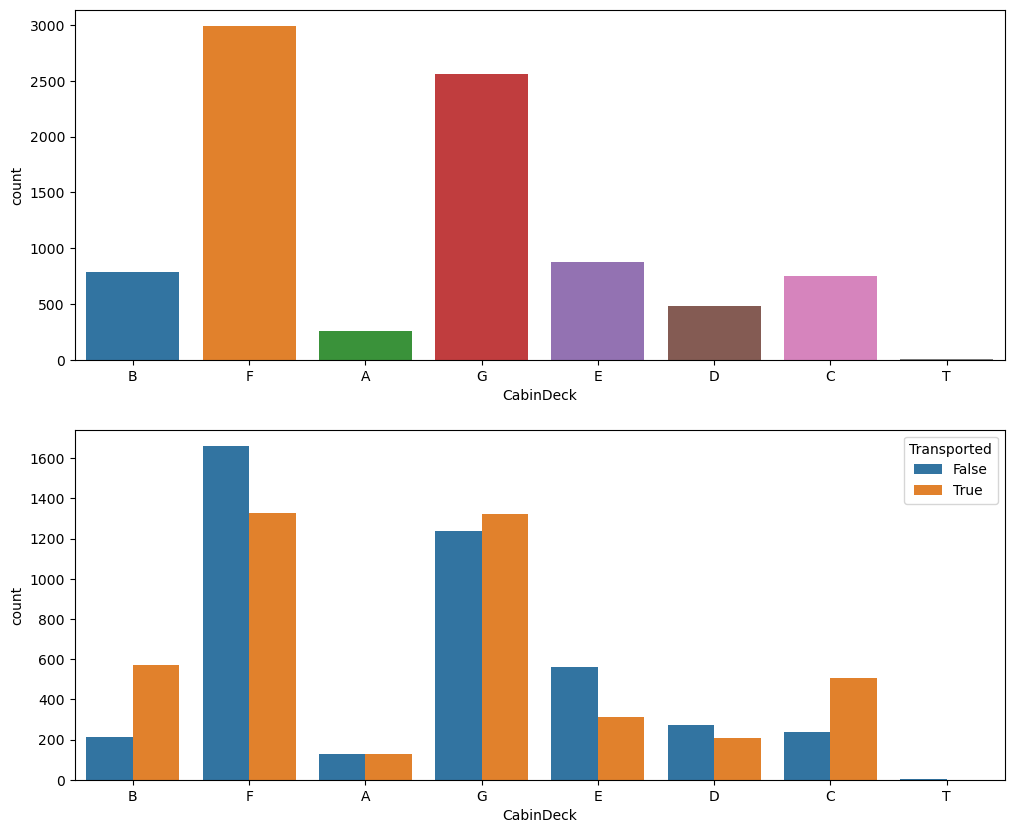

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.countplot(x='CabinDeck', data=train, ax=axes[0])
sns.countplot(x='CabinDeck', hue='Transported', data=train, ax=axes[1])

In [37]:
train[['CabinSide', 'Transported']].groupby('CabinSide').mean()

,Transported
CabinSide,
P,0.453967
S,0.554495


<AxesSubplot:xlabel='CabinSide', ylabel='count'>

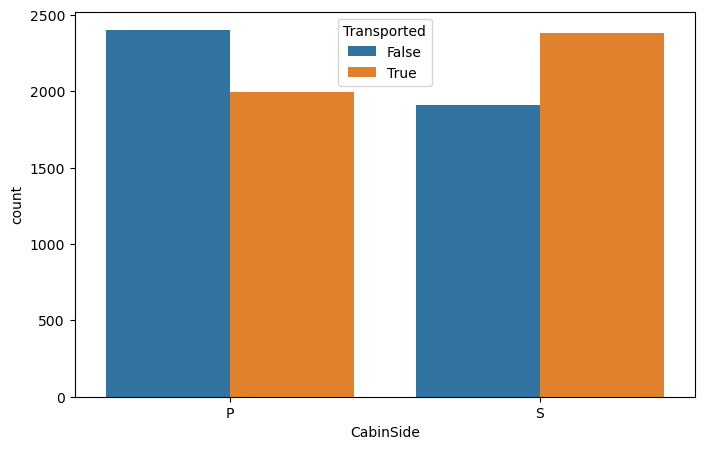

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x="CabinSide", hue='Transported', data=train)

In [39]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,CabinNum
Age,1.000000,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233,-0.009099,-0.129050
RoomService,0.068629,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,0.000375,-0.009188
FoodCourt,0.127390,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.009200,-0.180041
ShoppingMall,0.033148,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,0.017796,0.000679
Spa,0.120946,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.005198,-0.125225
VRDeck,0.099590,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.015945,-0.137066
Transported,-0.074233,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.021491,-0.043811
PassengerGroup,-0.009099,0.000375,-0.009200,0.017796,-0.005198,0.015945,0.021491,1.000000,0.666745
CabinNum,-0.129050,-0.009188,-0.180041,0.000679,-0.125225,-0.137066,-0.043811,0.666745,1.000000


<AxesSubplot:>

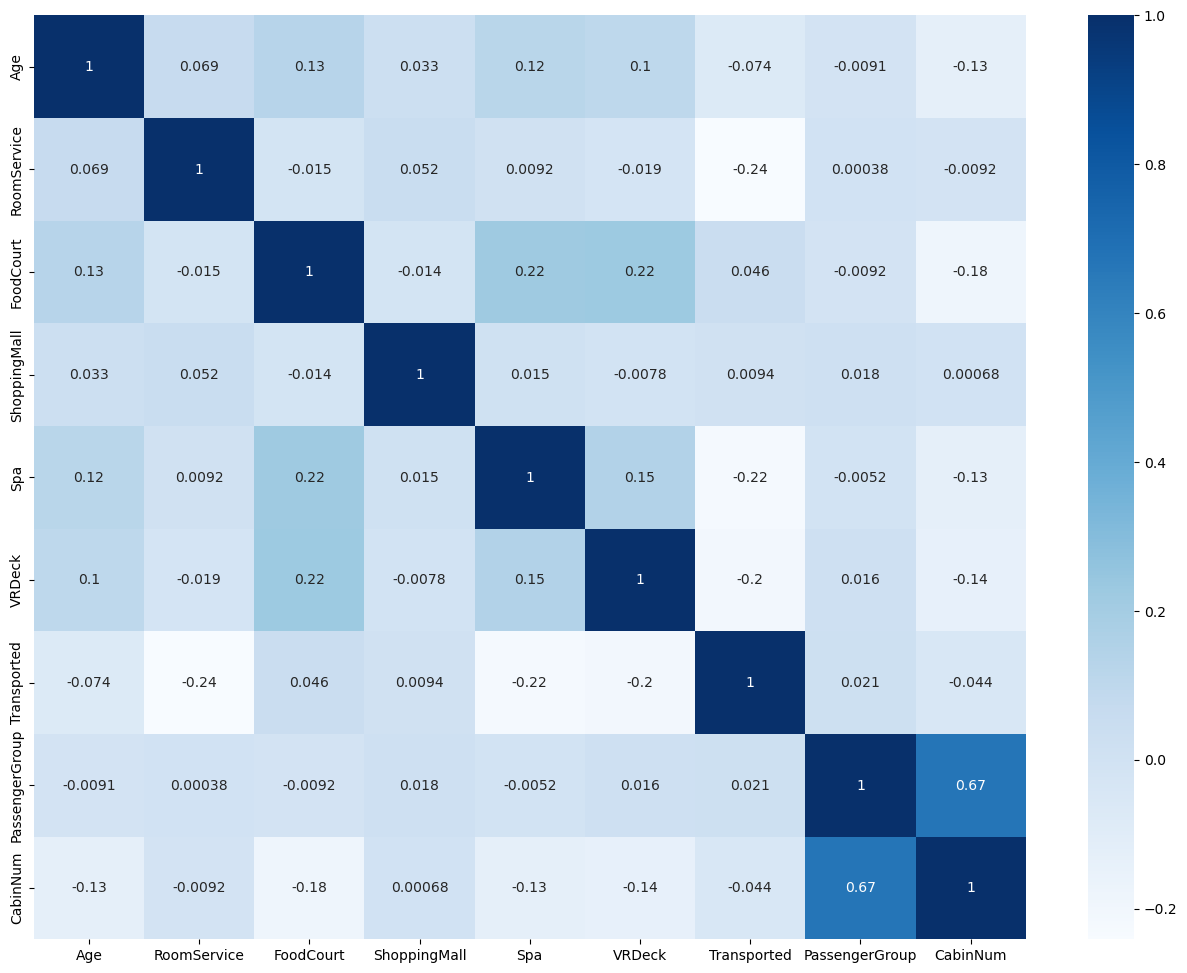

In [40]:
plt.figure(figsize=(16, 12))
sns.heatmap(train.corr(), cmap="Blues",  annot=True)

In [41]:
# Label Encoding
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')

In [42]:
combine = pd.concat([train, test], axis=0)

In [43]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [44]:
combine.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [45]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [46]:
combine['PassengerGroup'] = combine['PassengerId'].apply(lambda x:x.split('_')[0])

In [47]:
combine['PassengerGroup'] = pd.to_numeric(combine['PassengerGroup'])

In [48]:
# 결측값 처리
combine['Cabin'] = combine['Cabin'].fillna('N/-1/N') # Null값은 N/N/N으로 처리

combine['CabinDeck'] = combine['Cabin'].apply(lambda x:x.split('/')[0])
combine['CabinNum'] = combine['Cabin'].apply(lambda x:x.split('/')[1])
combine['CabinSide'] = combine['Cabin'].apply(lambda x:x.split('/')[2])

combine['CabinNum'] = pd.to_numeric(combine['CabinNum'], errors='coerce')

combine.loc[(combine['VIP']==True) & (combine['CabinDeck']=='N'), 'CabinDeck'] = 'B'
combine.loc[(combine['VIP']==False) & (combine['CabinDeck']=='N'), 'CabinDeck'] = 'F'

combine.loc[(combine['VIP'].isna()) & (combine['CabinDeck']=='N'), 'CabinDeck'] = 'F'
combine.loc[(combine['CabinDeck']=='B') & (combine['CabinNum']==-1), 'CabinNum'] = 166
combine.loc[(combine['CabinDeck']=='F') & (combine['CabinNum']==-1), 'CabinNum'] = 870

combine.loc[(combine['CabinDeck']=='B') & (combine['CabinSide']=='N'), 'CabinSide'] = 'S'
combine.loc[(combine['CabinDeck']=='F') & (combine['CabinSide']=='N'), 'CabinSide'] = 'P'

combine['CryoSleep'] = combine['CryoSleep'].fillna(0)
combine['VIP'] = combine['VIP'].fillna(0)

combine['RoomService'] = combine['RoomService'].fillna(combine['RoomService'].median())
combine['FoodCourt'] = combine['FoodCourt'].fillna(combine['FoodCourt'].median())
combine['ShoppingMall'] = combine['ShoppingMall'].fillna(combine['ShoppingMall'].median())
combine['Spa'] = combine['Spa'].fillna(combine['Spa'].median())
combine['VRDeck'] = combine['VRDeck'].fillna(combine['VRDeck'].median())
combine['Age'] = combine['Age'].fillna(combine['Age'].median())

combine['HomePlanet'] = combine['HomePlanet'].fillna(combine['HomePlanet'].mode()[0])
combine['Destination'] = combine['Destination'].fillna(combine['Destination'].mode()[0])

In [49]:
combine.isna().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               294
Transported       4277
PassengerGroup       0
CabinDeck            0
CabinNum             0
CabinSide            0
dtype: int64

In [50]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     12970 non-null  object 
 1   HomePlanet      12970 non-null  object 
 2   CryoSleep       12970 non-null  object 
 3   Cabin           12970 non-null  object 
 4   Destination     12970 non-null  object 
 5   Age             12970 non-null  float64
 6   VIP             12970 non-null  object 
 7   RoomService     12970 non-null  float64
 8   FoodCourt       12970 non-null  float64
 9   ShoppingMall    12970 non-null  float64
 10  Spa             12970 non-null  float64
 11  VRDeck          12970 non-null  float64
 12  Name            12676 non-null  object 
 13  Transported     8693 non-null   object 
 14  PassengerGroup  12970 non-null  int64  
 15  CabinDeck       12970 non-null  object 
 16  CabinNum        12970 non-null  int64  
 17  CabinSide       12970 non-null  

In [51]:
categorizational_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']

for col in categorizational_col:
    combine[col] = combine[col].astype('category').cat.codes

In [52]:
combine['AgeRange'] = pd.cut(combine['Age'], 6)
combine[['AgeRange', 'Transported']].groupby('AgeRange').mean()

,Transported
AgeRange,
"(-0.079, 13.167]",0.671595
"(13.167, 26.333]",0.479329
"(26.333, 39.5]",0.477528
"(39.5, 52.667]",0.500406
"(52.667, 65.833]",0.494465
"(65.833, 79.0]",0.476190


In [53]:
combine.loc[combine['Age'] <= 13, 'Age'] = 0
combine.loc[(combine['Age'] > 13) & (combine['Age'] <= 26), 'Age'] = 1
combine.loc[(combine['Age'] > 26) & (combine['Age'] <= 39), 'Age'] = 2
combine.loc[(combine['Age'] > 39) & (combine['Age'] <= 52), 'Age'] = 3
combine.loc[(combine['Age'] > 52) & (combine['Age'] <= 65), 'Age'] = 4
combine.loc[combine['Age'] > 65, 'Age'] = 5

combine.drop('AgeRange', inplace=True, axis=1)
combine.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,CabinDeck,CabinNum,CabinSide
0,0001_01,1,0,B/0/P,2,2.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,0,0
1,0002_01,0,0,F/0/S,2,1.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,5,0,1
2,0003_01,1,0,A/0/S,2,4.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,0,0,1
3,0003_02,1,0,A/0/S,2,2.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,0,0,1
4,0004_01,0,0,F/1/S,2,1.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,5,1,1


In [54]:
# Transported의 유무로 훈련과 데스트셋 분리
train = combine[pd.notnull(combine['Transported'])].sort_values(by='PassengerId')
test = combine[~pd.notnull(combine['Transported'])].sort_values(by='PassengerId')

passenger = test['PassengerId']
Y_train = train['Transported']

In [55]:
# 필요없는 열 제거
drop_col = ['Cabin', 'Name', 'PassengerId']
train = train.drop(drop_col, axis = 1)
test = test.drop(drop_col, axis=1)

In [56]:
train = train.drop('Transported', axis=1)

In [57]:
Y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: object

In [58]:
Y_train = Y_train.astype('category').cat.codes

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train, Y_train)
pred = knn.predict(train)


In [60]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_train, pred)
acc

0.8295180029909123

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train, Y_train)
pred = dt.predict(train)

acc = accuracy_score(Y_train, pred)
acc

0.9951685264005522

In [62]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier()
rf.fit(train, Y_train)
pred = rf.predict(train)

acc = accuracy_score(Y_train, pred)
acc

0.9951685264005522

In [63]:
gb = GradientBoostingClassifier()
gb.fit(train, Y_train)
pred = gb.predict(train)

acc = accuracy_score(Y_train, pred)
acc

0.817784424249396

In [64]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
hgb.fit(train, Y_train)
pred = hgb.predict(train)

acc = accuracy_score(Y_train, pred)
acc

0.8711607040147245

In [65]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train, Y_train)
pred = nb.predict(train)

acc = accuracy_score(Y_train, pred)
acc

0.7094213735189233

In [66]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train, Y_train)
pred = svc.predict(train)

acc = accuracy_score(Y_train, pred)
acc

0.7800529161394225

In [68]:
from sklearn.model_selection import GridSearchCV

rf_gs = RandomForestClassifier()

rf_params = {
    "n_estimators" : [100, 200, 300],
    "max_depth" : range(2, 20, 2)
}
grid_rf = GridSearchCV(rf_gs, rf_params, n_jobs=-1, cv=5)
grid_rf.fit(train, Y_train)

print('최적의 결과 : {}'.format(grid_rf.best_score_))
print('최적의 parameter set : ', grid_rf.best_params_)

최적의 결과 : 0.7641809010244238
최적의 parameter set :  {'max_depth': 6, 'n_estimators': 100}


In [ ]:
pred = grid_rf.predict(train)

acc = accuracy_score(Y_train, pred)
acc

In [ ]:
rf = RandomForestClassifier()
rf.fit(train, Y_train)
pred = rf.predict(train)

acc = accuracy_score(Y_train, pred)
acc

In [ ]:
pred_test = rf.predict(test)

In [72]:
test = test.drop(columns='Transported', axis=1)

In [ ]:
test.head()

In [ ]:
pred_test = rf.predict(test)

In [ ]:
pred_test

In [74]:
result_map = { 0:False, 1:True }

submission = pd.DataFrame({
    "PassengerId":passenger,
    "Transported":pred_test
})

NameError: name 'pred_test' is not defined

In [ ]:
submission.head()

In [ ]:
submission['Transported'] = submission['Transported'].map(result_map)

In [ ]:
submission.head()

In [ ]:
submission.to_csv("spaceship-submission.csv", index=False)

In [69]:
from xgboost import XGBClassifier

param_grid = {'n_estimators': [10, 25, 50, 75, 100],
              'learning_rate': [0.2, 0.15, 0.1, 0.05],
              'eval_metric': ['mlogloss']}
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(train, Y_train)
best_params = grid.best_params_
print('Best score of cross validation: {:.2f}'.format(grid.best_score_))
print('Best parameters:', best_params)

Best score of cross validation: 0.73
Best parameters: {'eval_metric': 'mlogloss', 'learning_rate': 0.05, 'n_estimators': 25}


In [73]:
xgb = XGBClassifier()
xgb.set_params(**best_params)
xgb.fit(train, Y_train)

Y_pred = xgb.predict(test)

In [75]:
result_map = { 0:False, 1:True }

submission = pd.DataFrame({
    "PassengerId":passenger,
    "Transported":Y_pred
})

In [76]:
submission['Transported'] = submission['Transported'].map(result_map)

In [77]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [78]:
submission.to_csv("spaceship-submission-xgb.csv", index=False)